# 📘 Restaurant Chains Data Analysis — Practice Notebook

This notebook contains hands-on exercises to analyze restaurant chains using Python, Pandas, Seaborn, and Matplotlib.

### 📂 Dataset Assumption:
The dataset contains the following columns:
- `restaurant_name`
- `location`
- `votes`
- `aggregate_rating`
- `cuisines`
- `cost_for_two`

---

### 🧠 Basic Level

1. **Load the dataset** using Pandas and display the first 5 rows.

In [1]:
# Your code here
import pandas as pd
df = pd.read_csv('restaurants_cleaned.csv')
df.head()

,restaurant_name,location,votes,aggregate_rating,cuisines,cost_for_two
0,Restaurant 126,Mumbai,3292,3.0,Continental,500
1,Restaurant 195,Kolkata,2882,3.0,Continental,1500
2,Restaurant 174,Chennai,3396,4.8,Bakery,500
3,Restaurant 21,Mumbai,2596,3.4,Continental,300
4,Restaurant 199,Hyderabad,2907,3.1,Chinese,300


2. How many **unique restaurants** are present in the dataset?

In [2]:
# Your code here
unique_restaurants = df['restaurant_name'].nunique()
print("Number of unique restaurants:", unique_restaurants)


Number of unique restaurants: 188


3. Find the **top 10 most frequently occurring** restaurant names.

In [3]:
# Your code here
frequent_restaurants= df['restaurant_name'].value_counts().head(10)
print("Most Frequently occurring restaurant names are ",frequent_restaurants)

Most Frequently occurring restaurant names are  restaurant_name
Restaurant 55     8
Restaurant 27     7
Restaurant 67     6
Restaurant 126    6
Restaurant 1      6
Restaurant 35     6
Restaurant 52     6
Restaurant 199    6
Restaurant 83     6
Restaurant 134    6
Name: count, dtype: int64


4. How many restaurants have a rating **greater than 4.0**?

In [36]:
# Your code here
df['aggregate_rating'] = pd.to_numeric(df['aggregate_rating'], errors='coerce')
high_rating_restaurants = df[df['aggregate_rating'] > 4.0]
count = high_rating_restaurants.shape[0]
print(f"Number of restaurants with rating > 4.0: {count}")


Number of restaurants with rating > 4.0: 187


5. Display the count of restaurants by **location** using a bar chart.

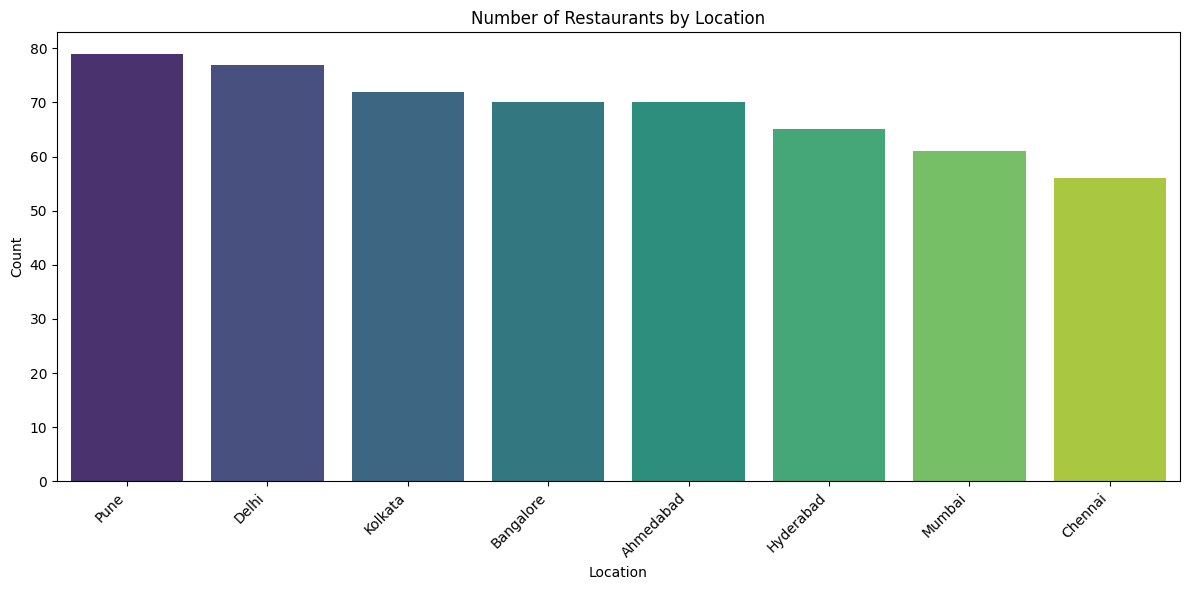

In [5]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

location_counts = df['location'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.title('Number of Restaurants by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 📊 Intermediate Level

6. Identify restaurant **chains** (names that appear more than 3 times).

In [37]:
# Your code here
name_counts = df['restaurant_name'].value_counts()
chains = name_counts[name_counts > 3]
print("Restaurant Chains (names appearing more than 3 times):")
print(chains)

Restaurant Chains (names appearing more than 3 times):
restaurant_name
Restaurant 55     8
Restaurant 27     7
Restaurant 67     6
Restaurant 126    6
Restaurant 1      6
Restaurant 35     6
Restaurant 52     6
Restaurant 199    6
Restaurant 83     6
Restaurant 134    6
Restaurant 71     6
Restaurant 36     6
Restaurant 85     5
Restaurant 132    5
Restaurant 172    5
Restaurant 165    5
Restaurant 5      5
Restaurant 174    5
Restaurant 145    5
Restaurant 79     5
Restaurant 50     5
Restaurant 32     5
Restaurant 38     5
Restaurant 159    5
Restaurant 107    5
Restaurant 18     5
Restaurant 200    5
Restaurant 66     5
Restaurant 116    4
Restaurant 33     4
Restaurant 146    4
Restaurant 196    4
Restaurant 182    4
Restaurant 100    4
Restaurant 150    4
Restaurant 89     4
Restaurant 31     4
Restaurant 19     4
Restaurant 42     4
Restaurant 144    4
Restaurant 99     4
Restaurant 88     4
Restaurant 96     4
Restaurant 57     4
Restaurant 191    4
Restaurant 82     4
Restauran

7. Create a new DataFrame of only **chain restaurants**.

In [ ]:
# Your code here
chain_names = name_counts[name_counts > 3].index
chain_df = df[df['restaurant_name'].isin(chain_names)].reset_index(drop=True)
print(chain_df.head())
print(f"Shape of chain restaurants DataFrame: {chain_df.shape}")

  restaurant_name   location  votes  aggregate_rating     cuisines  \
0  Restaurant 126     Mumbai   3292               3.0  Continental   
1  Restaurant 195    Kolkata   2882               3.0  Continental   
2  Restaurant 174    Chennai   3396               4.8       Bakery   
3  Restaurant 199  Hyderabad   2907               3.1      Chinese   
4   Restaurant 67     Mumbai   4436               3.0      Chinese   

   cost_for_two  
0           500  
1          1500  
2           500  
3           300  
4          1200  
Shape of chain restaurants DataFrame: (279, 6)


8. For each chain, calculate the **average aggregate rating**.

In [40]:
# Your code here
chain_df = df[df['restaurant_name'].isin(chain_names)]
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean().sort_values(ascending=False)
print("Average Aggregate Rating for Each Chain:")
print(average_ratings)

Average Aggregate Rating for Each Chain:
restaurant_name
Restaurant 52     4.283333
Restaurant 35     4.283333
Restaurant 132    4.120000
Restaurant 200    4.120000
Restaurant 38     4.080000
Restaurant 15     4.075000
Restaurant 55     4.075000
Restaurant 42     4.075000
Restaurant 89     4.050000
Restaurant 82     4.000000
Restaurant 182    3.975000
Restaurant 90     3.975000
Restaurant 50     3.940000
Restaurant 7      3.925000
Restaurant 134    3.916667
Restaurant 99     3.900000
Restaurant 199    3.900000
Restaurant 79     3.880000
Restaurant 47     3.850000
Restaurant 24     3.850000
Restaurant 146    3.825000
Restaurant 145    3.820000
Restaurant 116    3.800000
Restaurant 102    3.775000
Restaurant 5      3.760000
Restaurant 174    3.760000
Restaurant 1      3.750000
Restaurant 83     3.750000
Restaurant 191    3.750000
Restaurant 32     3.740000
Restaurant 57     3.725000
Restaurant 19     3.700000
Restaurant 107    3.700000
Restaurant 100    3.700000
Restaurant 66     3.68000

9. For each chain, calculate the **total number of votes** received.

In [41]:
# Your code here
total_votes = chain_df.groupby('restaurant_name')['votes'].sum().sort_values(ascending=False)
print("Total Number of Votes for Each Chain:")
print(total_votes)

Total Number of Votes for Each Chain:
restaurant_name
Restaurant 66     18883
Restaurant 27     18192
Restaurant 132    18191
Restaurant 50     16711
Restaurant 42     16499
Restaurant 47     16080
Restaurant 126    15348
Restaurant 82     15322
Restaurant 35     15100
Restaurant 71     15070
Restaurant 1      14642
Restaurant 55     14392
Restaurant 67     14179
Restaurant 79     14171
Restaurant 144    14137
Restaurant 134    14033
Restaurant 36     13924
Restaurant 196    13734
Restaurant 106    13485
Restaurant 52     13257
Restaurant 174    12669
Restaurant 116    12579
Restaurant 15     12557
Restaurant 165    12555
Restaurant 83     12178
Restaurant 38     11854
Restaurant 150    11847
Restaurant 88     11263
Restaurant 33     11233
Restaurant 159    11016
Restaurant 18     10901
Restaurant 172    10825
Restaurant 191    10713
Restaurant 57     10561
Restaurant 145    10412
Restaurant 199    10351
Restaurant 96     10237
Restaurant 99     10076
Restaurant 85      9785
Restaurant

10. Visualize the **top 5 chains** with the highest average rating using a **Seaborn bar plot**.

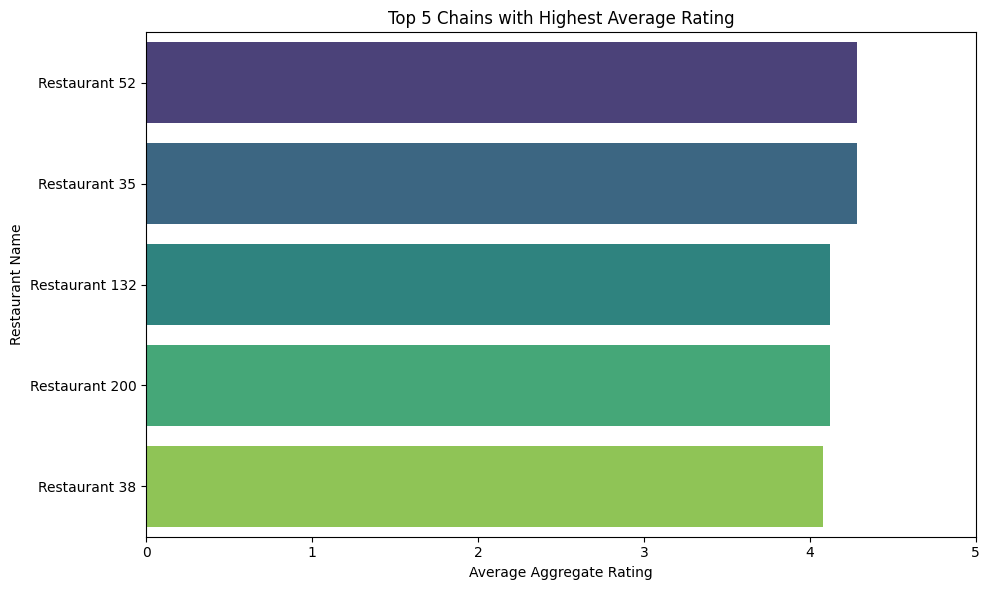

In [42]:
# Your code here
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean()
top5_chains = average_ratings.sort_values(ascending=False).head(5).reset_index()
top5_chains.columns = ['restaurant_name', 'average_rating']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_chains,
    x='average_rating',
    y='restaurant_name',
    palette='viridis'
)
plt.title('Top 5 Chains with Highest Average Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


### 📈 Advanced Level

11. Compare the **popularity (votes)** of top 5 chains **across locations** using a grouped bar chart.

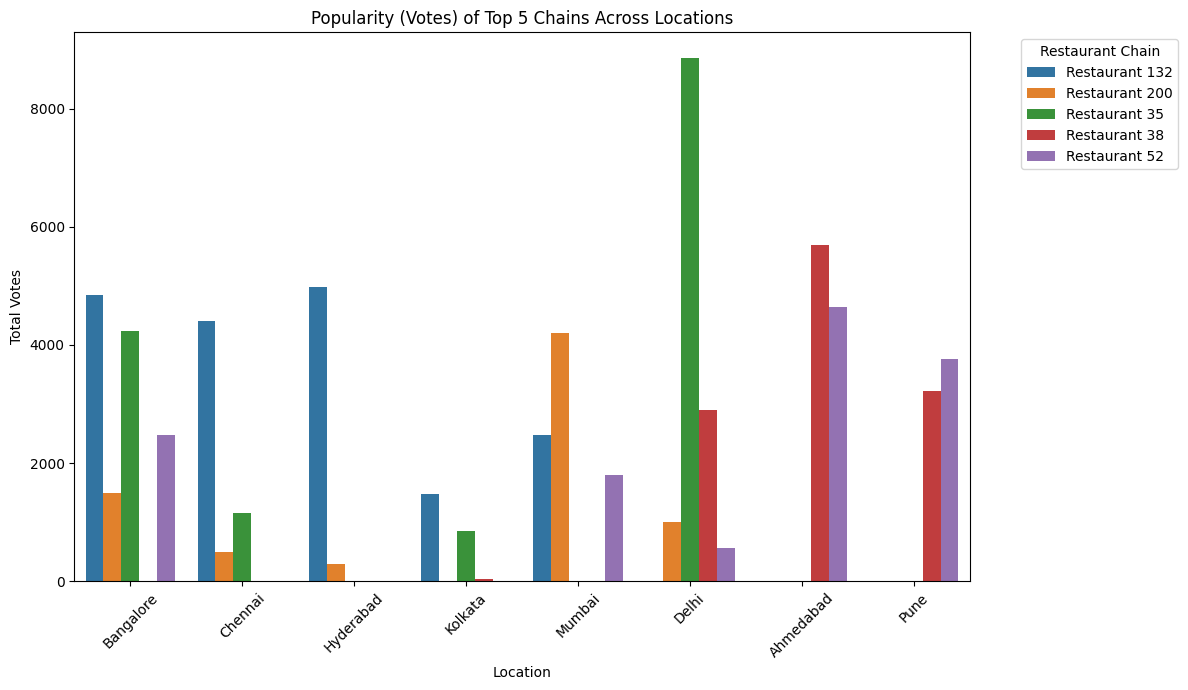

In [45]:
# Your code here
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean()
top5_chains = average_ratings.sort_values(ascending=False).head(5).index
top5_df = chain_df[chain_df['restaurant_name'].isin(top5_chains)]
votes_per_chain_location = top5_df.groupby(['restaurant_name', 'location'])['votes'].sum().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(
    data=votes_per_chain_location,
    x='location',
    y='votes',
    hue='restaurant_name',
    palette='tab10'
)
plt.title('Popularity (Votes) of Top 5 Chains Across Locations')
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Restaurant Chain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


12. Plot a **boxplot** showing the distribution of ratings for the top 5 chains.

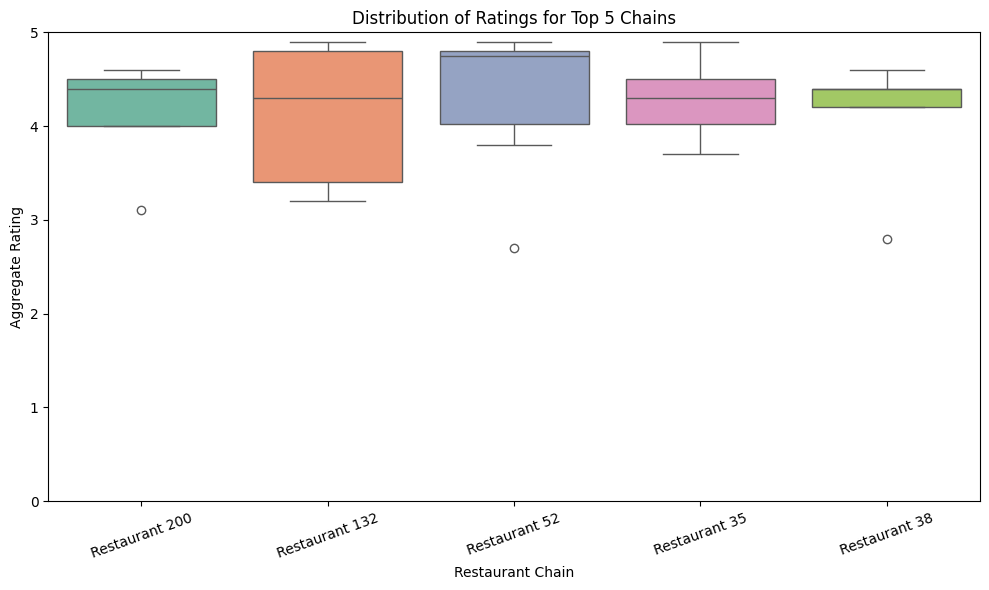

In [46]:
# Your code here
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean()
top5_chains = average_ratings.sort_values(ascending=False).head(5).index
top5_df = chain_df[chain_df['restaurant_name'].isin(top5_chains)]
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=top5_df,
    x='restaurant_name',
    y='aggregate_rating',
    palette='Set2'
)
plt.title('Distribution of Ratings for Top 5 Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Aggregate Rating')
plt.ylim(0, 5)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


13. Which locations have the **highest number of high-rated chain restaurants** (rating > 4.2)?

In [47]:
# Your code here
high_rated_chains = chain_df[chain_df['aggregate_rating'] > 4.2]
location_counts = high_rated_chains['location'].value_counts()
print("Locations with the highest number of high-rated chain restaurants (rating > 4.2):")
print(location_counts)


Locations with the highest number of high-rated chain restaurants (rating > 4.2):
location
Delhi        14
Hyderabad    14
Ahmedabad    12
Chennai       9
Mumbai        9
Pune          8
Bangalore     8
Kolkata       8
Name: count, dtype: int64


14. Find the **average cost for two** for each chain. Sort in descending order.

In [49]:
# Your code here
average_cost = chain_df.groupby('restaurant_name')['cost_for_two'].mean().sort_values(ascending=False)
print("Average Cost for Two for Each Chain (Descending):")
print(average_cost)

Average Cost for Two for Each Chain (Descending):
restaurant_name
Restaurant 195    1250.000000
Restaurant 106    1175.000000
Restaurant 31     1175.000000
Restaurant 52     1150.000000
Restaurant 66     1140.000000
Restaurant 196    1125.000000
Restaurant 182    1125.000000
Restaurant 55     1075.000000
Restaurant 116    1075.000000
Restaurant 27     1071.428571
Restaurant 38     1060.000000
Restaurant 168    1050.000000
Restaurant 19     1050.000000
Restaurant 67     1033.333333
Restaurant 50     1020.000000
Restaurant 150    1000.000000
Restaurant 15     1000.000000
Restaurant 90     1000.000000
Restaurant 89      975.000000
Restaurant 199     966.666667
Restaurant 57      950.000000
Restaurant 58      950.000000
Restaurant 144     950.000000
Restaurant 165     940.000000
Restaurant 79      940.000000
Restaurant 83      933.333333
Restaurant 82      925.000000
Restaurant 172     920.000000
Restaurant 126     916.666667
Restaurant 85      900.000000
Restaurant 132     900.000000
Rest

15. Create a final summary table of top 5 chains including:
   - Number of outlets
   - Average rating
   - Total votes
   - Average cost for two

In [50]:
# Your code here
average_ratings = chain_df.groupby('restaurant_name')['aggregate_rating'].mean()
top5_chains = average_ratings.sort_values(ascending=False).head(5).index
top5_df = chain_df[chain_df['restaurant_name'].isin(top5_chains)]
summary = top5_df.groupby('restaurant_name').agg(
    number_of_outlets = ('restaurant_name', 'count'),
    average_rating = ('aggregate_rating', 'mean'),
    total_votes = ('votes', 'sum'),
    average_cost_for_two = ('cost_for_two', 'mean')
).sort_values(by='average_rating', ascending=False).reset_index()
print("Final Summary Table of Top 5 Chains:")
print(summary)

Final Summary Table of Top 5 Chains:
  restaurant_name  number_of_outlets  average_rating  total_votes  \
0   Restaurant 35                  6        4.283333        15100   
1   Restaurant 52                  6        4.283333        13257   
2  Restaurant 132                  5        4.120000        18191   
3  Restaurant 200                  5        4.120000         7505   
4   Restaurant 38                  5        4.080000        11854   

   average_cost_for_two  
0                 850.0  
1                1150.0  
2                 900.0  
3                 900.0  
4                1060.0  
